# ✅ Graph Mining HW03 (221017)
- [제출파일]
  - 다음 두 파일을 zip 파일로 묶어 제출하시오. (파일명: hw03_학번+이름.zip)
    1. 해당 파일 내 코드 및 답변을 추가한 ipynb 파일 (파일명: hw03_answer_학번+이름.ipynb)
    2. 논문 리뷰를 수행한 pdf, doc, hwp 중 하나의 파일 (파일명: hw03_review_학번+이름.png)
- [제출기한] 10월 24일 (월) 자정 (23:59까지)
- [유의사항] 
  1. 제출 파일 형식에 맞춰 결과물을 정확히 제출할 것.
  2. 제출 기한을 엄수할 것.

# [과제1] K-POP Fandom 그래프 시각화 및 분석 [40점]
- [목표] K-POP 팬덤 그래프를 다시 정의해보고, 이를 시각화하기에 알맞은 형태로 바꾼 후 시각화할 것.

## 1. 데이터 불러오기 [5점]
- node 파일과 edge파일을 불러오시오.
- edge weight로 사용할 total_support 컬럼을 만드시오.

In [1]:
# ------- code ------- #
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt


nodes = pd.read_csv('fandom_nodes.csv')
edges = pd.read_csv('fandom_edges.csv')

edges['total_support'] = edges['jan_support'] + edges['feb_support']

In [2]:
# Check
nodes

,fandom_id,fandom_name,jan_post,feb_post,type
0,000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0
1,19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1
2,2PM,2PM,1787,355,1
3,6kies,SECHSKIES : 젝스키스,49116,23535,1
4,Jessica,JESSICA : 제시카,1091,546,0
...,...,...,...,...,...
261,yoonjo,YOON JO / UNI.T : 윤조,1555,1358,0
262,yooyeonjung,YEONJUNG / WJSN (Cosmic Girls) : 유연정,4059,2670,0
263,youjung,CHOI YOOJUNG / Weki Meki : 최유정,9914,9340,0
264,yuseonho,YOO SEON-HO : 유선호,9849,4704,1


In [3]:
# Check
edges 

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


## 2. Edge Filtering [10점]

- 원활한 시각화를 위해 의미 있는 edge 만 포함하고 나머지는 지우시오.
- 이를 위해 weight 기준으로 상위 1%에 해당되는 edge만 남기고 나머지 edge는 제거할 것.

### Hint

- 다음 numpy의 percentile 함수를 활용하여 계산할 것.

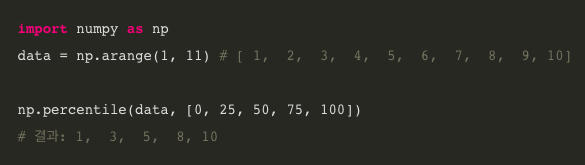

In [4]:
# ------- code ------- #
import numpy as np

edge_list = edges[edges['total_support']>= np.percentile(edges['total_support'],99)]
edge_list = edge_list.drop(['jan_support','feb_support'],axis='columns')

In [5]:
# Check 
edge_list

,source,target,total_support
281,6kies,6kies,279
744,ahnhyungsub,ahnhyungsub,474
791,ahnhyungsub,jbj,250
917,aoa,gf,225
954,aoa,kimjaehwan,249
...,...,...,...
24893,woojinyoung,nebula,215
24946,woojinyoung,wannaone,200
24947,woojinyoung,wartortle,298
24951,woojinyoung,winkgall,355


## 3. 그래프 정의 및 저장 [5점]

- K-POP Fandom Collaboration Graph 정의
    - directed / weighted
    - Node : Fandom
    - Edge : Fandom 간 상호작용
    - Weight : Weight는 source 팬덤이 target 팬덤에게 도움을 준 횟수 (posting 개수)
    
    
- 정의한 그래프를 gephi에서 불러올 수 있는 형태로 저장하시오.

In [24]:
# ------- code ------- #
graph = nx.DiGraph(edge_list.loc[:, ('source', 'target')].values.tolist())
edges_weight = edge_list.loc[:, ('source', 'target', 'total_support')].values.tolist()
graph.add_weighted_edges_from(edges_weight)

In [26]:
# Check
graph.number_of_edges(), graph.number_of_nodes()

(263, 84)

In [25]:
id = edge_list['source'].values

for i in id: 
  node_id = i 
  gender = nodes[nodes["fandom_id"]==i]["type"].values[0]

  graph.add_nodes_from([
    (i, {'gender':gender})
  ])



id = edge_list['target'].values

for i in id: 
  node_id = i 
  gender = nodes[nodes["fandom_id"]==i]["type"].values[0]

  graph.add_nodes_from([
    (i, {'gender':gender})
  ])

In [28]:
# Check
for i, edata in enumerate(graph.edges(data=True)):
    print(i, edata)
    break


0 ('6kies', '6kies', {'weight': 279})


In [29]:
nx.write_graphml_lxml(graph, "hw03_graph.graphml")

## 4. 그래프 시각화 [20점]
- 논문에 들어간 그래프와 유사하게 시각화 하시오.
- 채점 기준
    - layout & template를 조절하시오.
    - 노드 크기를 적절히 조절하시오. (5점)
    - 노드 색상을 적절히 조절하시오. (5점)
    - 노드 텍스트의 크기를 적절히 조절하시오. (5점)
    - 엣지의 색상을 적절히 조절하시오. (5점)

- 시각화를 모두 수행한 후, 자신이 정의한 그래프 이미지를 아래 붙여넣으시오.  
답 : 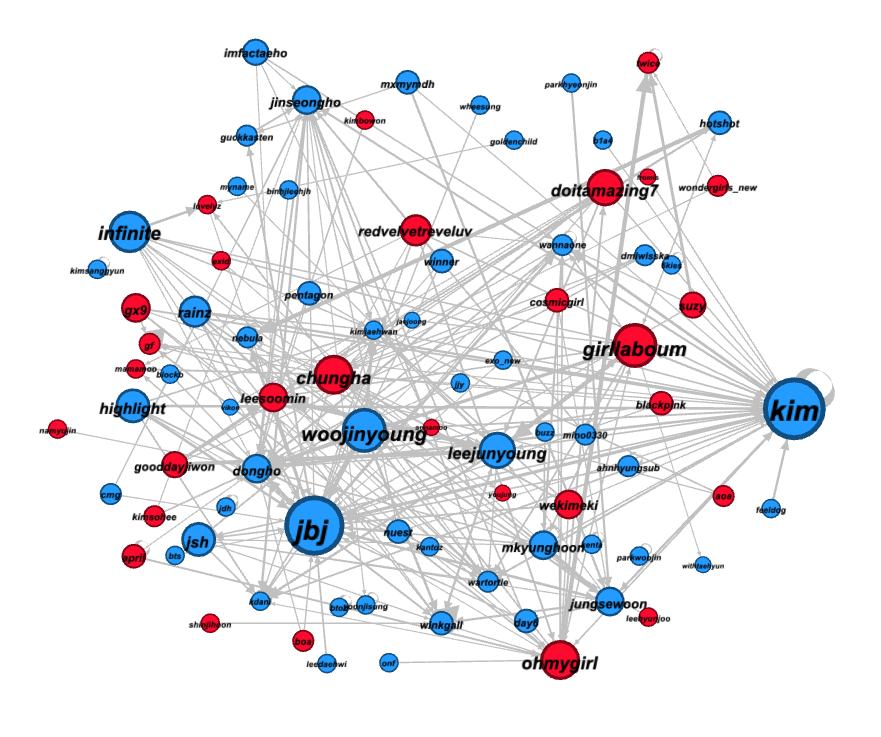

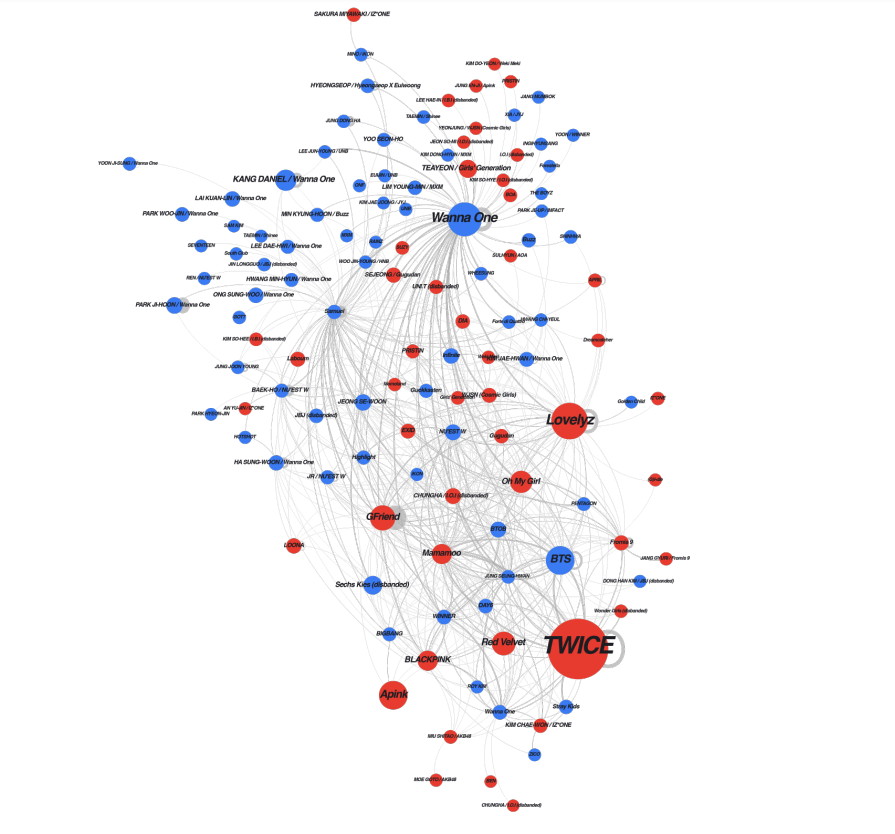

# [과제2] 네트워크 분석 논문 리뷰 [60점]

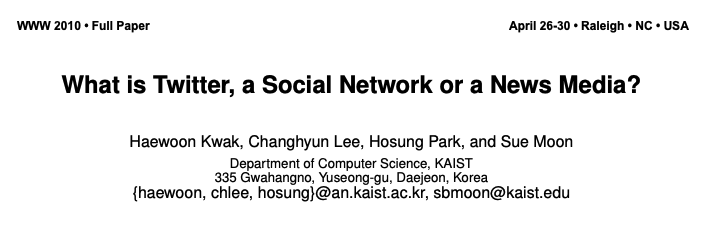

### What is Twitter, a social network or a news media?
Kwak, Haewoon, et al.  Proceedings of the 19th international conference on World wide web. 2010.

- 인용횟수 9000회 이상
- Twitter 데이터를 활용해 분석을 수행한 첫 논문. (국내 카이스트 연구진이 수행)
- 세계적으로 영향력 있는 소셜 네트워크 논문으로, 2010년 논문인만큼 비교적 쉬운 분석 기법을 바탕으로 연구 수행됨.

## ✅ 과제 수행 내용
- 논문의 흐름에 맞게 읽고 이해한 내용을 요약하여 서술하시오.

- 논문의 3~6장의 내용을 요약할 때는, 다음 항목에 집중하시오.
    1. **분석에 사용되는 개념** (homophily, reciprocity...)
    2. **분석 방법** (PageRank, CDF...)
    3. **분석 결과** (일부의 사용자만 트위터 내에서 상호 관계를 유지한다 등, figure와 연결해서 서술)


- 논문 마지막에는 가장 인상깊었던 분석 인사이트에 대해 최소 두 개 소개하시오. 
    - 분석 기법에 대한 인사이트, 분석 결과에 대한 인사이트 등 논문을 읽으면서 얻을 수 있었던 새로운 지식에 대해 자유롭게 서술
    - 또는 논문 내용 중 인상깊었던 내용에 대해 그 이유와 함께 작성.
    - 각 항목 별로 최소 2줄 이상 작성할 것. 

## ✅ 과제 수행 방식
 
- 논문을 읽고, 리뷰하여 doc 또는 hwp, pdf 중 하나로 제출할 것.
- 리뷰는 한글/영어 상관없이 편한 언어로 작성할 것.
- Figure 포함 최대 8장 이내로 제출할 것.
- 다른 부분보다도 3~6(분석)장에 해당되는 내용에 집중할 것.

## ✅ 채점 기준
- 논문의 섹션을 기준으로, 다음 각 부분에 대한 내용 포함 여부에 따라 점수 배분.
    1. 1~2장 : 5점
    2. 3장 : 10점
    3. 4장 : 10점
    4. 5장 : 10점
    5. 6장 : 10점
    6. 7~8장 : 5점
    7. 분석 인사이트 : 10점 (각 5점)